In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjust the configuration of the plots we will create

In [2]:
#read the csv
df = pd.read_csv(r'C:\Users\Kabir\Downloads\Movie Industry\movies.csv')

In [3]:
#loook at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.shape

(7668, 15)

In [5]:
#search for missing value
for col in df.columns:
    pct_missing = np.sum(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0%
rating - 77%
genre - 0%
year - 0%
released - 2%
score - 3%
votes - 3%
director - 0%
writer - 3%
star - 1%
country - 3%
budget - 2171%
gross - 189%
company - 17%
runtime - 4%


In [6]:
#remove the missing raws
df = df.dropna()

In [7]:
#check missing values ahain

for col in df.columns:
    number_missing = np.sum(df[col].isnull())
    print('{} - {}'.format(col, number_missing))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [8]:
#after remove the missing values, shape is 
df.shape

(5421, 15)

In [9]:
#data type for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#sorted the columns in alphabet wise 
df = df.reindex(sorted(df.columns), axis=1)
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [12]:
# Change the data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [13]:
#seperate release_date and release_place from release column
df[['release_date', 'release_place']] = df['released'].astype(str).str.split("(", expand = True)
df['release_date'] = df['release_date'].str[:-1]
df['release_place'] = df['release_place'].str[:-1]
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_date,release_place
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146,8.4,Jack Nicholson,927000,Stephen King,1980,"June 13, 1980",United States
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,"July 2, 1980",United States
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124,8.7,Mark Hamill,1200000,Leigh Brackett,1980,"June 20, 1980",United States
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88,7.7,Robert Hays,221000,Jim Abrahams,1980,"July 2, 1980",United States
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,"July 25, 1980",United States


In [15]:
#create correct_year column from release_date
df['correct_year'] = df['release_date'].astype(str).str[-4:]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_date,release_place,correct_year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146,8.4,Jack Nicholson,927000,Stephen King,1980,"June 13, 1980",United States,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,"July 2, 1980",United States,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124,8.7,Mark Hamill,1200000,Leigh Brackett,1980,"June 20, 1980",United States,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88,7.7,Robert Hays,221000,Jim Abrahams,1980,"July 2, 1980",United States,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,"July 25, 1980",United States,1980


In [17]:
#sorting gross values by ascending order
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [18]:
#all row display from daaset
#pd.set_option('display.max_rows', None)

In [19]:
#Drop duplicates values or seen all unique values for specific column
df['company'].drop_duplicates().sort_values(ascending = False)
# df['company'] = df['company'].drop_duplicates() 

#drop all duplicate from whole dataframe
#df.drop_duplicates()

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

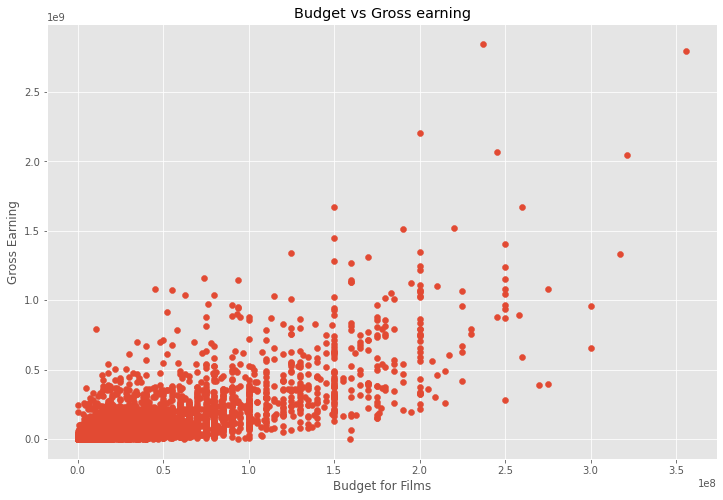

In [20]:
# budget and gross have high correlation
#scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross earning')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

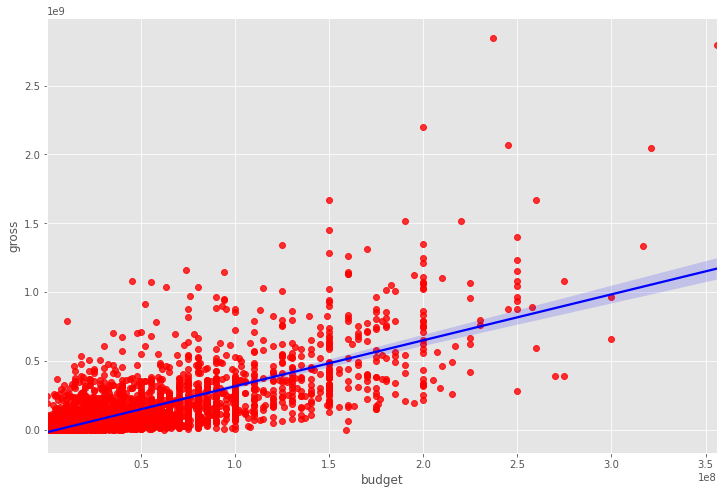

In [21]:
#plot regression line for budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = { "color" : "blue"})

In [22]:
#findout the correlation
#there are three type correlation represent in pandas. those are pearson, kendall, spearman
df.corr(method = 'pearson')
#below the correlation matrix represent high correlation between budget and gross


,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


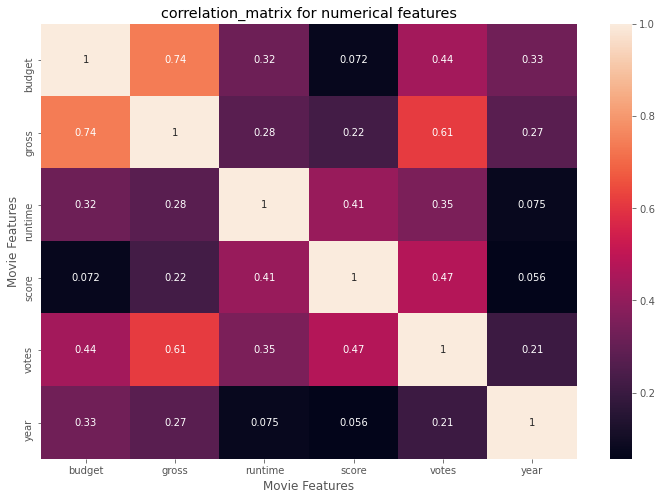

In [23]:
#visualizataion the correlation matrix
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation_matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [24]:
#convert the object type to category type
df_convert_numeric = df

for col_name in df_convert_numeric.columns:
    if(df_convert_numeric[col_name].dtype == 'object'):
        df_convert_numeric[col_name] = df_convert_numeric[col_name].astype('category')
        df_convert_numeric[col_name] = df_convert_numeric[col_name].cat.codes
        

df_convert_numeric

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_date,release_place,correct_year
5445,237000000,1382,47,785,0,2847246203,386,5,527,162,7.8,1534,1100000,1263,2009,496,47,29
7445,356000000,983,47,105,0,2797501328,388,5,137,181,8.4,1470,903000,513,2019,124,47,39
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194,7.8,1073,1100000,1263,1997,502,47,17
6663,245000000,945,47,768,0,2069521700,3643,5,529,138,7.8,356,876000,1806,2015,498,47,35
7244,321000000,983,47,105,0,2048359754,389,5,145,149,8.4,1470,897000,513,2018,132,47,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3000000,1385,47,585,6,5073,3794,6,890,96,5.8,1498,3500,2924,2009,847,41,35
2434,5000000,1376,47,1805,0,2970,2969,5,1467,97,4.5,186,1900,3102,1993,1386,39,14
3681,5000000,466,6,952,6,2554,1595,3,1721,108,6.8,527,43000,1683,2000,1628,8,21
272,800000,582,47,261,9,2270,2909,6,1525,85,3.9,1473,2300,55,1982,1442,47,2


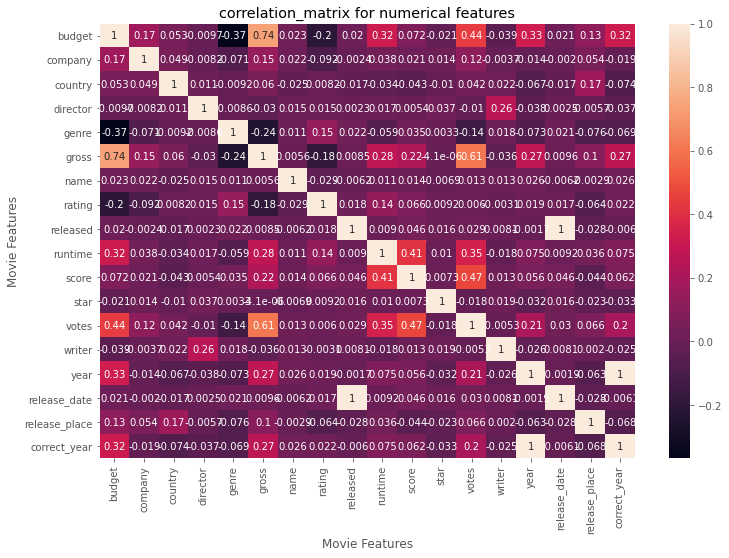

In [25]:
#visualizataion the correlation matrix for df_convert_numeric
correlation_matrix = df_convert_numeric.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation_matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [26]:
#find out the correlation for whole dataframe
df_convert_numeric.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,release_date,release_place,correct_year
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.021144,0.126976,0.320312
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.001996,0.054484,-0.018806
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.017043,0.167894,-0.073569
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,0.002481,-0.005705,-0.037371
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,0.021321,-0.075552,-0.069147
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.009643,0.100029,0.268721
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,-0.006155,-0.002908,0.025542
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.017349,-0.063883,0.022021
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740,0.999951,-0.027578,-0.005989
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.009234,0.036272,0.075294


In [27]:
#showing the correlation stack wise
corr_matrix = df_convert_numeric.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

budget        budget           1.000000
              company          0.170235
              country          0.052977
              director        -0.009662
              genre           -0.368523
                                 ...   
correct_year  writer          -0.025495
              year             0.998726
              release_date    -0.006091
              release_place   -0.067536
              correct_year     1.000000
Length: 324, dtype: float64

In [28]:
#sorted correlation pair wise
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
budget        rating         -0.203946
                                ...   
votes         votes           1.000000
writer        writer          1.000000
year          year            1.000000
released      released        1.000000
correct_year  correct_year    1.000000
Length: 324, dtype: float64

In [29]:
#find out the high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross          votes            0.614751
votes          gross            0.614751
gross          budget           0.740247
budget         gross            0.740247
correct_year   year             0.998726
year           correct_year     0.998726
release_date   released         0.999951
released       release_date     0.999951
budget         budget           1.000000
release_date   release_date     1.000000
company        company          1.000000
country        country          1.000000
director       director         1.000000
genre          genre            1.000000
gross          gross            1.000000
name           name             1.000000
release_place  release_place    1.000000
rating         rating           1.000000
runtime        runtime          1.000000
score          score            1.000000
star           star             1.000000
votes          votes            1.000000
writer         writer           1.000000
year           year             1.000000
released       r

In [30]:
#votes and budget have high correlation 